# Practical Machine Learning for Beginners

**A Hands-on Course with Real-life Examples and Python Code**

## Course Overview

This 10-module course introduces machine learning through real-world applications. You'll work with pandas for data manipulation and scikit-learn for model building, focusing on practical skills rather than theory alone.

### Module 1: Getting Started with Machine Learning

#### Topics

- What is machine learning and why is it useful?
- Setting up your Python environment
- Introduction to key libraries: pandas, NumPy, scikit-learn
- Your first ML project: Predicting house prices

#### Hands-on Project

**Real Estate Price Predictor:** Build a simple linear regression model to predict housing prices based on square footage, number of bedrooms, and location.

- To use data from Kaggle with this example, you'll need to follow these steps:

- First, create a Kaggle account if you don't have one already.
- Visit the Kaggle dataset page for housing data. One good option is the "House Prices - Advanced Regression Techniques" dataset: - -   https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
= Download the dataset to your local machine.
- For the code you provided, you'll need to modify it slightly because the column names in the Kaggle dataset will be different from the example:


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load housing dataset from Kaggle
housing_df = pd.read_csv('data/house/train.csv')  # Kaggle file name is likely 'train.csv'

# Basic data exploration
print(housing_df.head())
print(housing_df.describe())

# Feature selection - adjust column names to match Kaggle dataset
features = ['LotArea', 'BedroomAbvGr', 'FullBath', 'MSZoning']  # Example columns from Kaggle dataset
X = housing_df[features]

# Handle categorical features
X = pd.get_dummies(X, columns=['MSZoning'], drop_first=True)

y = housing_df['SalePrice']  # Target variable in Kaggle dataset

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: ${rmse:.2f}")

# Interpret coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: ${coef:.2f} per unit")

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### Module 2: Data Preparation and Exploration

#### Topics

- Data cleaning and handling missing values
- Exploratory data analysis (EDA)
- Feature engineering and selection
- Data visualization for insights

#### Hands-on Project

**Customer Churn Analysis:** Prepare and explore telecom customer data to identify patterns related to customer churn.


To get the Telco Customer Churn dataset from Kaggle for this example, follow these steps:

Access the Dataset on Kaggle:
- Visit Telco Customer Churn dataset on Kaggle.https://www.kaggle.com/datasets/blastchar/telco-customer-churn
Download the Dataset:
- Click on the "Download" button to get the CSV file.
- Place the File in Your Working Directory:
- Move the downloaded "WA_Fn-UseC_-Telco-Customer-Churn.csv" file to your project folder.


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

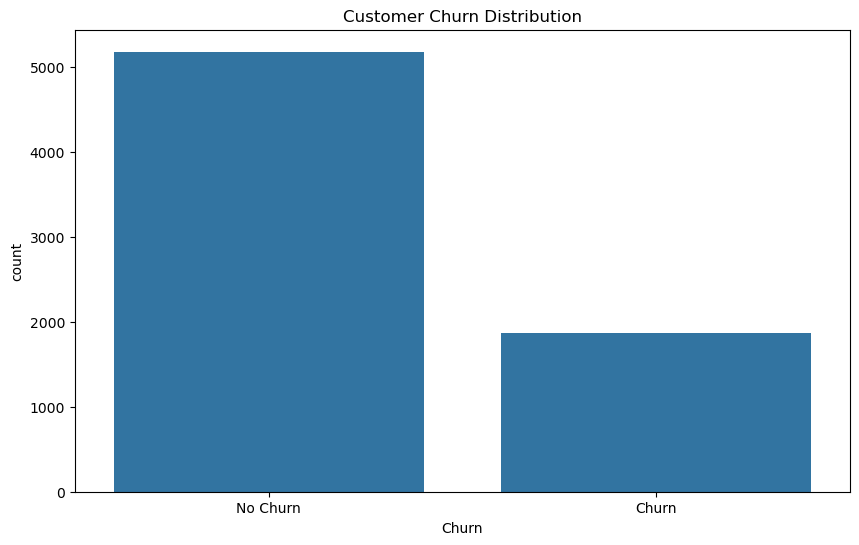

Top correlations with churn:
Churn                             1.000000
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
SeniorCitizen                     0.150889
StreamingTV_Yes                   0.063228
StreamingMovies_Yes               0.061382
MultipleLines_Yes                 0.040102
PhoneService                      0.011942
Name: Churn, dtype: float64
Churn rate by customer value segment:
HighValue
False    0.275894
True     0.248523
Name: Churn, dtype: float64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the telecom customer dataset from Kaggle
telecom_df = pd.read_csv('data/telco/churn.csv')

# Take a look at the first few rows to understand the data
print(telecom_df.head())
print(telecom_df.dtypes)

# Drop the customerID column since it's not needed for analysis
telecom_df = telecom_df.drop('customerID', axis=1)

# Convert TotalCharges to numeric, coercing errors to NaN
telecom_df['TotalCharges'] = pd.to_numeric(telecom_df['TotalCharges'], errors='coerce')

# Handle missing values
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].fillna(telecom_df['TotalCharges'].mean())

# Convert categorical variables to numeric
telecom_df['gender'] = telecom_df['gender'].map({'Male': 0, 'Female': 1})

# Convert Churn to numeric
telecom_df['Churn'] = telecom_df['Churn'].map({'No': 0, 'Yes': 1})

# For correlation analysis, convert all yes/no columns to 1/0
yes_no_columns = ['PhoneService', 'PaperlessBilling', 'Partner', 'Dependents', 'SeniorCitizen']
for col in yes_no_columns:
    if col in telecom_df.columns:
        if telecom_df[col].dtype == 'object':  # Only apply to string columns
            telecom_df[col] = telecom_df[col].map({'Yes': 1, 'No': 0})

# Create dummy variables for other categorical features
# Only include columns that are categorical and not yet encoded
categorical_columns = telecom_df.select_dtypes(include=['object']).columns.tolist()
telecom_df = pd.get_dummies(telecom_df, columns=categorical_columns, drop_first=True)

# Now check for any remaining non-numeric columns
print("Remaining non-numeric columns:")
print(telecom_df.select_dtypes(exclude=['number']).columns.tolist())

# Exploratory visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=telecom_df)
plt.title('Customer Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

# Now all columns should be numeric for correlation analysis
correlation = telecom_df.corr()['Churn'].sort_values(ascending=False)
print("Top correlations with churn:")
print(correlation.head(10))

# Feature engineering
telecom_df['HighValue'] = (telecom_df['MonthlyCharges'] > 70) & (telecom_df['tenure'] > 12)
print("Churn rate by customer value segment:")
print(telecom_df.groupby('HighValue')['Churn'].mean())



### Module 3: Classification Models

#### Topics

- Binary and multi-class classification
- Logistic regression
- Decision trees and random forests
- Model evaluation metrics

#### Hands-on Project

**Email Spam Detector:** Build a classifier to distinguish between spam and legitimate emails.


### To use the Kaggle dataset for your spam detection project, I recommend using the "SMS Spam Collection Dataset" which is perfect for this task. Here's how to do it:

#### Getting the Dataset

- Go to Kaggle: [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
- Download the CSV file (`spam.csv`)
- Place it in your working directory


Dataset sample:
  label                                            message  is_spam
0   ham  Go until jurong point, crazy.. Available only ...        0
1   ham                      Ok lar... Joking wif u oni...        0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        1
3   ham  U dun say so early hor... U c already then say...        0
4   ham  Nah I don't think he goes to usf, he lives aro...        0

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1202
           1       0.91      0.92      0.91       191

    accuracy                           0.98      1393
   macro avg       0.95      0.95      0.95      1393
weighted avg       0.98      0.98      0.98      1393


Confusion Matrix:
[[1185   17]
 [  16  175]]


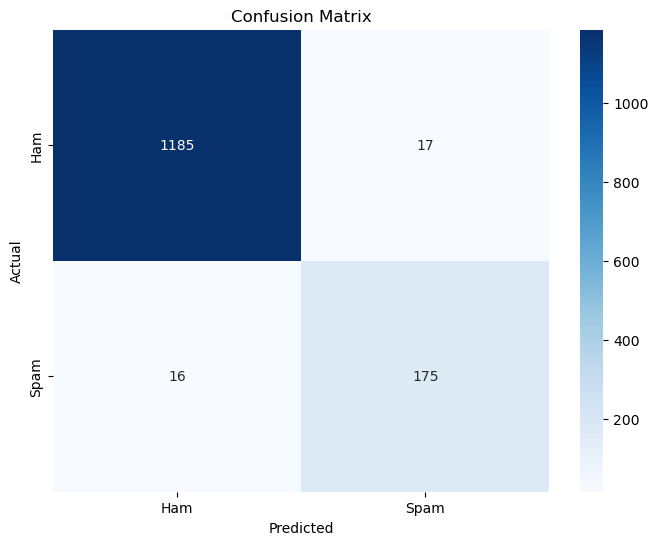


Top spam indicator words:
prize
reply
www
claim
text
mobile
stop
ur
txt
free


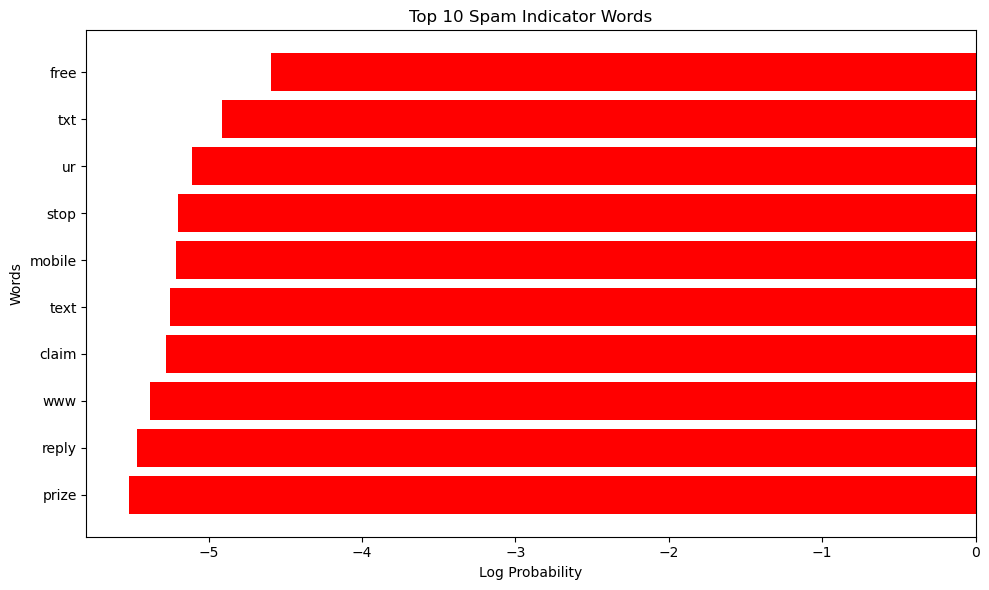


Top legitimate (ham) indicator words:
come
know
like
got
ll
ur
ok
just
gt
lt


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load email dataset from Kaggle
# The SMS Spam Collection dataset has columns 'v1' (label) and 'v2' (message text)
emails_df = pd.read_csv('data/email/spam.csv', encoding='latin-1')

# Keep only the necessary columns and rename them
emails_df = emails_df[['v1', 'v2']]
emails_df.columns = ['label', 'message']

# Convert label to binary (0 for ham, 1 for spam)
emails_df['is_spam'] = emails_df['label'].map({'ham': 0, 'spam': 1})

print("Dataset sample:")
print(emails_df.head())

print("\nClass distribution:")
print(emails_df['label'].value_counts())

# Process text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(emails_df['message'])
y = emails_df['is_spam']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Naive Bayes classifier
spam_classifier = MultinomialNB()
spam_classifier.fit(X_train, y_train)

# Make predictions
y_pred = spam_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Identify most predictive words
feature_names = vectorizer.get_feature_names_out()
top_spam_indices = spam_classifier.feature_log_prob_[1].argsort()[-10:]
print("\nTop spam indicator words:")
for index in top_spam_indices:
    print(feature_names[index])

# Visualize top spam indicator words
plt.figure(figsize=(10, 6))
plt.barh(range(10), 
         spam_classifier.feature_log_prob_[1][top_spam_indices], 
         color='red')
plt.yticks(range(10), [feature_names[i] for i in top_spam_indices])
plt.xlabel('Log Probability')
plt.ylabel('Words')
plt.title('Top 10 Spam Indicator Words')
plt.tight_layout()
plt.show()

# Identify top legitimate (ham) words
top_ham_indices = spam_classifier.feature_log_prob_[0].argsort()[-10:]
print("\nTop legitimate (ham) indicator words:")
for index in top_ham_indices:
    print(feature_names[index])

### Important Notes:

- **Column Names:** The Kaggle dataset uses `'v1'` for labels (`'ham'` or `'spam'`) and `'v2'` for the message text, so I've adjusted the code to handle this.
- **Encoding:** The SMS Spam Collection dataset uses `'latin-1'` encoding, which is specified in the `read_csv` function.
- **Stop Words:** I've added `stop_words='english'` to the `CountVectorizer` to remove common English words that don't add value to the classification.
- **Visualizations:** I've added visualizations for the confusion matrix and top spam indicator words to enhance your analysis.
- **Extended Analysis:** The code now also identifies the top ham (legitimate) indicator words for comparison.

This adaptation will work with the Kaggle SMS Spam Collection dataset and give you a solid spam detection model with comprehensive evaluation metrics.


### Module 4: Regression Models

#### Topics

- Linear regression
- Polynomial regression
- Regularization techniques
- Regression model evaluation

#### Hands-on Project

**Sales Forecasting:** Predict future sales based on advertising spend across different media channels.


##### To use the Kaggle dataset for your advertising sales prediction model, I recommend using the "Advertising Dataset" that's commonly used for analyzing the relationship between advertising spend and sales. Here's how to use it:

#### Getting the Dataset

- Go to Kaggle: [Advertising Dataset](https://www.kaggle.com/datasets/ashydv/advertising-dataset)
- Download the CSV file (`Advertising.csv`)
- Place it in your working directory

The dataset has exactly the columns your code expects: `'TV'`, `'Radio'`, `'Newspaper'`, and `'Sales'`, so no column name modifications are needed!


First 5 rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


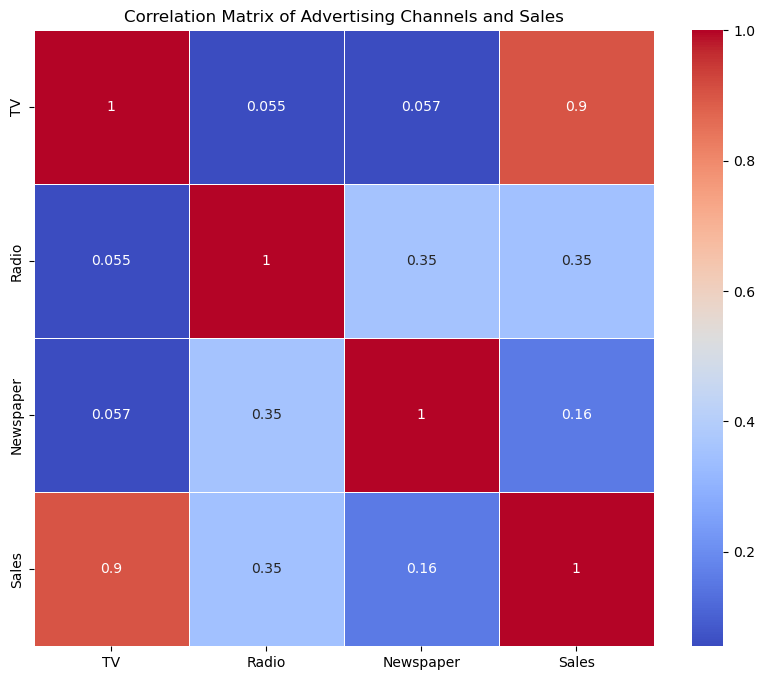


Model Performance Comparison:
Linear Regression RMSE: 1.71, R²: 0.91
Polynomial Regression RMSE: 1.20, R²: 0.95

Feature Importance (Linear Model):
TV impact: 0.05 units of sales per advertising dollar
Radio impact: 0.10 units of sales per advertising dollar
Newspaper impact: 0.00 units of sales per advertising dollar


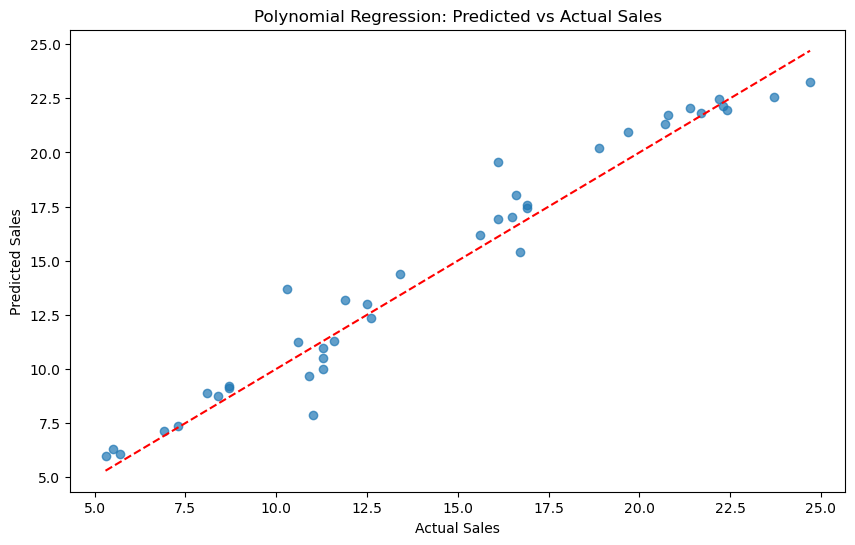

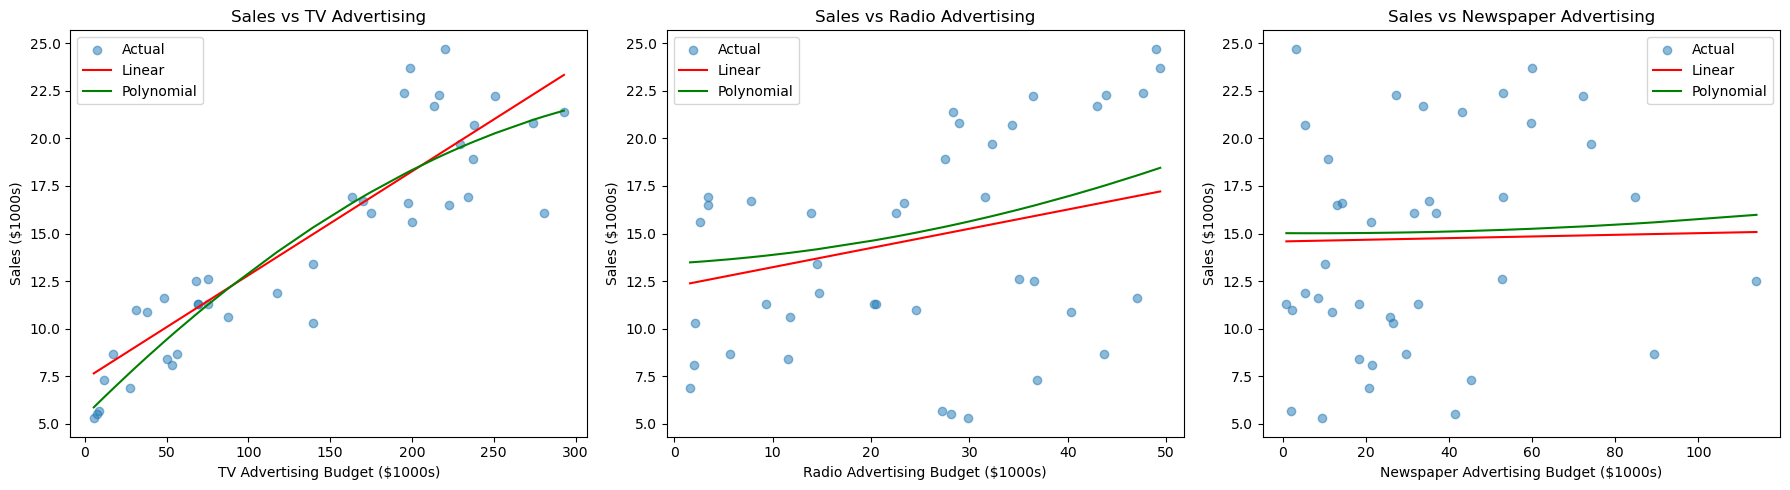

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load advertising and sales data from Kaggle
ad_df = pd.read_csv('data/ads/Advertising.csv')

# The dataset might have an index column, so drop it if present
if 'Unnamed: 0' in ad_df.columns:
    ad_df = ad_df.drop('Unnamed: 0', axis=1)

print("First 5 rows of the dataset:")
print(ad_df.head())

# Data summary
print("\nDataset summary statistics:")
print(ad_df.describe())

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(ad_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Advertising Channels and Sales')
plt.show()

# Select features
X = ad_df[['TV', 'Radio', 'Newspaper']]
y = ad_df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)

# Polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = Ridge(alpha=0.1)  # Using Ridge regression to prevent overfitting
poly_model.fit(X_poly_train, y_train)
poly_pred = poly_model.predict(X_poly_test)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))
poly_r2 = r2_score(y_test, poly_pred)

# Compare models
print("\nModel Performance Comparison:")
print(f"Linear Regression RMSE: {linear_rmse:.2f}, R²: {linear_r2:.2f}")
print(f"Polynomial Regression RMSE: {poly_rmse:.2f}, R²: {poly_r2:.2f}")

# Feature importance for linear model
print("\nFeature Importance (Linear Model):")
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"{feature} impact: {coef:.2f} units of sales per advertising dollar")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, poly_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Polynomial Regression: Predicted vs Actual Sales')
plt.show()

# Visualize the impact of each advertising channel (partial dependence plots)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
channels = ['TV', 'Radio', 'Newspaper']

for i, channel in enumerate(channels):
    # Sort the data by the current channel
    sorted_idx = X_test[channel].argsort()
    axs[i].scatter(X_test[channel].iloc[sorted_idx], y_test.iloc[sorted_idx], alpha=0.5, label='Actual')
    
    # Create a temporary dataframe with other channels at their mean
    X_temp = X_test.copy()
    for other_channel in channels:
        if other_channel != channel:
            X_temp[other_channel] = X_test[other_channel].mean()
    
    # Linear predictions
    linear_preds = linear_model.predict(X_temp)
    axs[i].plot(X_test[channel].iloc[sorted_idx], linear_preds[sorted_idx], 'r-', label='Linear')
    
    # Polynomial predictions
    poly_preds = poly_model.predict(poly.transform(X_temp))
    axs[i].plot(X_test[channel].iloc[sorted_idx], poly_preds[sorted_idx], 'g-', label='Polynomial')
    
    axs[i].set_xlabel(f'{channel} Advertising Budget ($1000s)')
    axs[i].set_ylabel('Sales ($1000s)')
    axs[i].set_title(f'Sales vs {channel} Advertising')
    axs[i].legend()

plt.tight_layout()
plt.show()

### Module 5: Clustering and Unsupervised Learning

#### Topics

- K-means clustering
- Hierarchical clustering
- DBSCAN
- Customer segmentation

#### Hands-on Project

**Customer Segmentation:** Group customers based on purchasing behavior for targeted marketing.


### To use the Mall Customer Segmentation dataset from Kaggle for your clustering analysis, follow these steps:

#### Getting the Dataset

- Go to Kaggle: [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)
- Download the CSV file (`Mall_Customers.csv`)
- Place it in your working directory


First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Column names: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Modified dataset:
   Customer_ID  Gender  Age  Annual_Income  Spending_Score  Purchase_Frequency
0            1    Male   19             15              39               0.585
1            2    Male   21             15              81               1.215
2            3  Female   20             16               6               0.096
3            4  Female   23             16              77               1.232
4            5  Female   31         

C:\Users\John\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\John\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\John\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\John\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

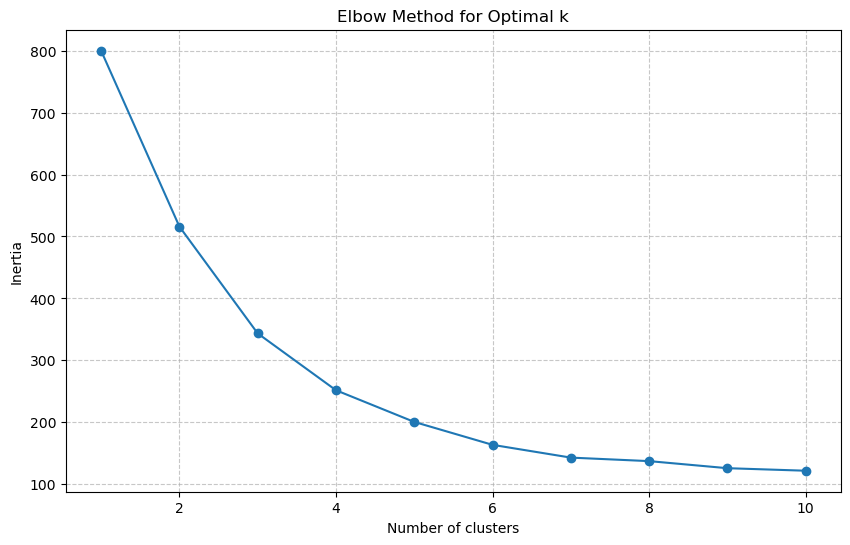

C:\Users\John\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


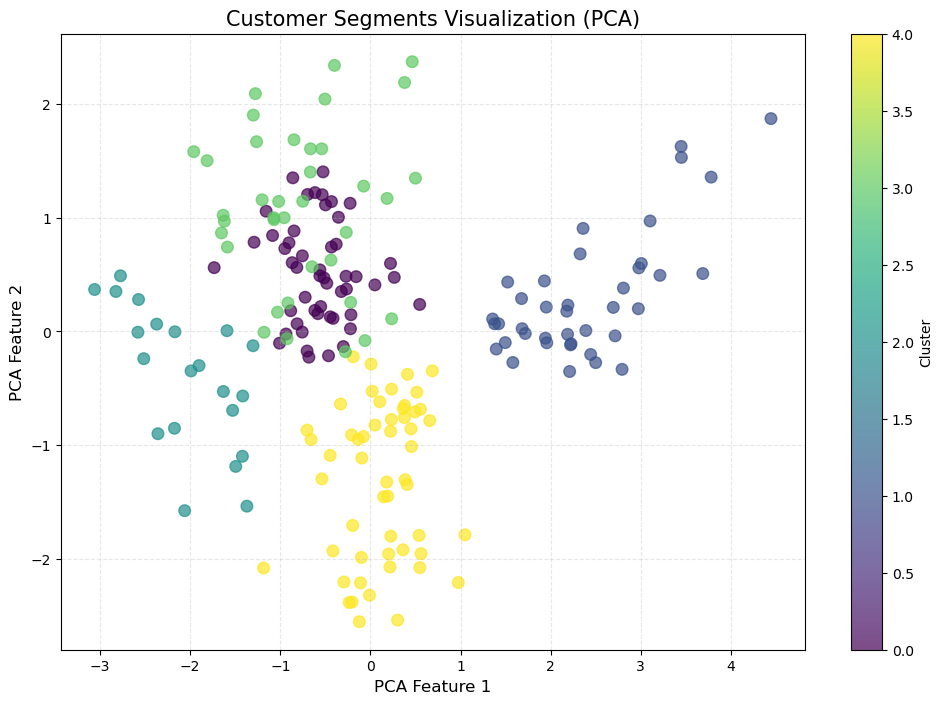

Cluster Profiles:
         Annual_Income  Spending_Score    Age  Purchase_Frequency
Cluster                                                          
0                55.32           48.64  54.82                2.68
1                86.54           82.13  32.69                7.10
2                26.29           19.38  45.52                0.53
3                86.95           18.30  39.70                1.60
4                41.55           62.66  25.08                2.42


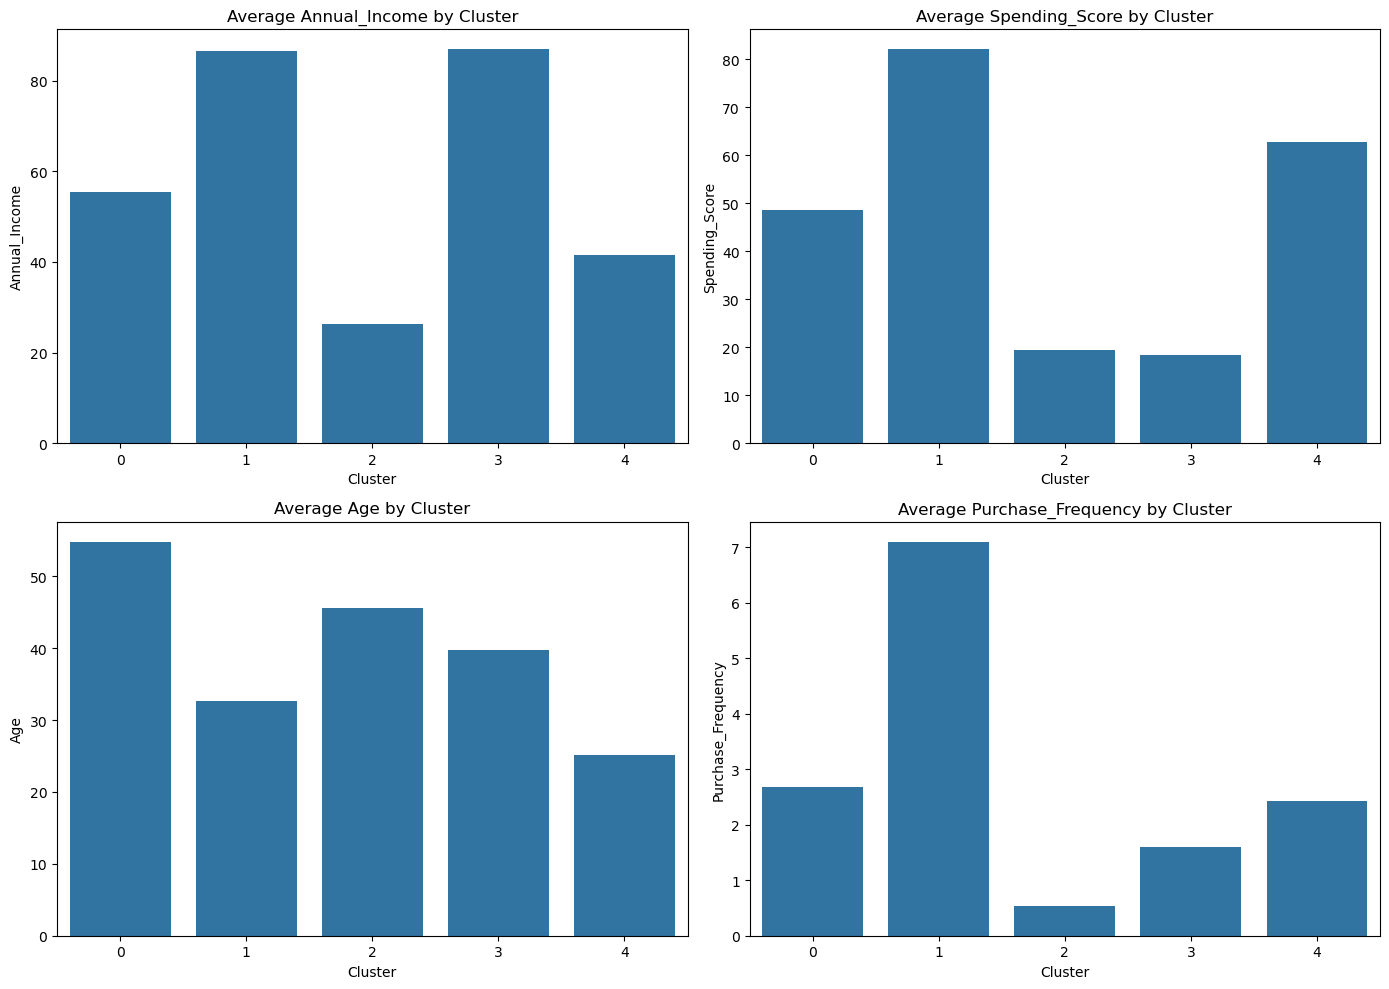

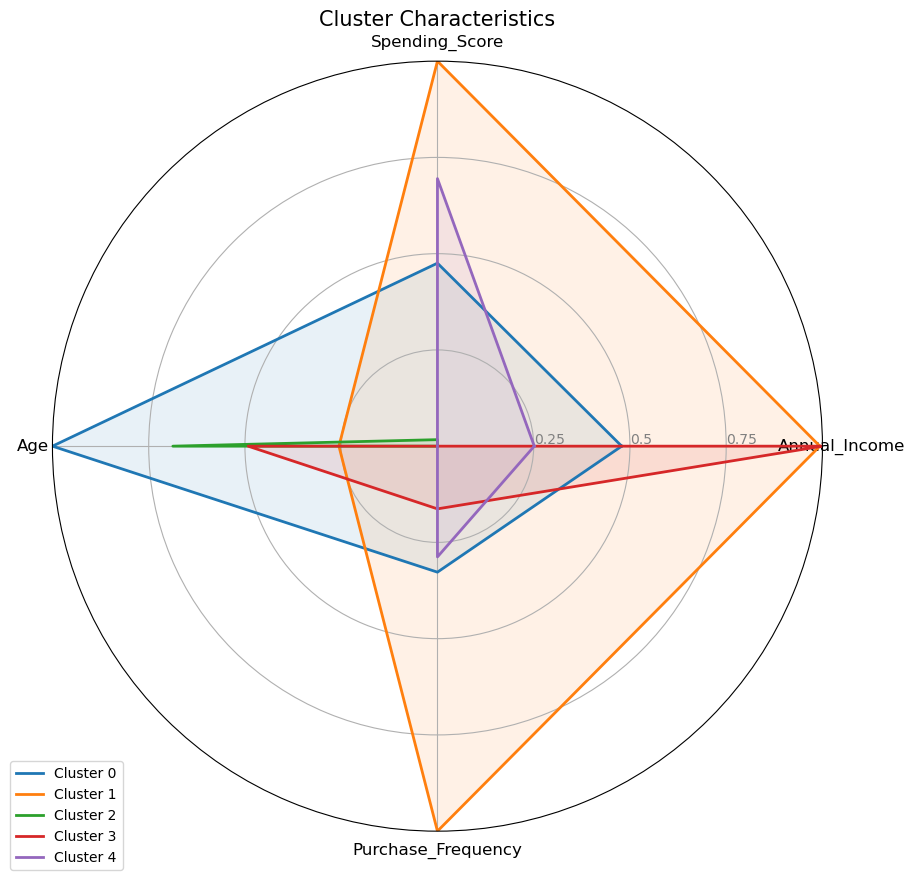


Marketing Strategy Recommendations:

Cluster 0:
Average Segment: General marketing strategies

Cluster 1:
Premium Customer Segment: Offer exclusive products and loyalty rewards

Cluster 2:
Average Segment: General marketing strategies

Cluster 3:
Potential Growth Segment: Personalized marketing to increase engagement

Cluster 4:
Value-Seeking Segment: Offer promotions and discounts


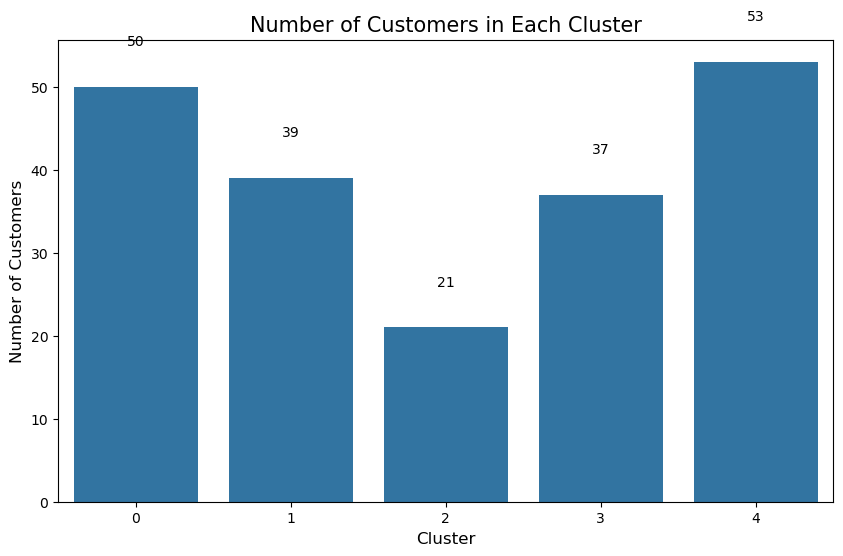

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer purchase data from Kaggle
customers_df = pd.read_csv('data/mall/Mall_Customers.csv')

# Examine the dataset
print("First 5 rows of the dataset:")
print(customers_df.head())
print("\nColumn names:", customers_df.columns.tolist())

# Rename columns to match with your code (if needed)
customers_df = customers_df.rename(columns={
    'CustomerID': 'Customer_ID',
    'Gender': 'Gender',
    'Age': 'Age',
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
})

# Add Purchase_Frequency as a combination of Spending_Score and Annual_Income
# Since this column doesn't exist in the original dataset
customers_df['Purchase_Frequency'] = (customers_df['Spending_Score'] / 20) * (customers_df['Annual_Income'] / 50)

# Display the modified dataset
print("\nModified dataset:")
print(customers_df.head())

# Select and prepare features for clustering
features = ['Annual_Income', 'Spending_Score', 'Age', 'Purchase_Frequency']
X = customers_df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Apply K-means with optimal k
optimal_k = 5  # Determined from elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customers_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=customers_df['Cluster'],
    cmap='viridis',
    alpha=0.7,
    s=70
)
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Segments Visualization (PCA)', fontsize=15)
plt.xlabel('PCA Feature 1', fontsize=12)
plt.ylabel('PCA Feature 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Analyze cluster profiles
cluster_profiles = customers_df.groupby('Cluster')[features].mean().round(2)
print("Cluster Profiles:")
print(cluster_profiles)

# Visualize the cluster profiles
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=cluster_profiles.index, y=feature, data=cluster_profiles.reset_index())
    plt.title(f'Average {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Create a radar chart to visualize cluster characteristics
from math import pi

# Set data
categories = features
N = len(categories)

# Create figure
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# What will be the angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], categories, size=12)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10)
plt.ylim(0, 1)

# Normalize the data for radar chart
radar_df = cluster_profiles.copy()
for feature in features:
    radar_df[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# Plot each cluster
for cluster in range(optimal_k):
    values = radar_df.loc[cluster].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Cluster Characteristics', size=15)
plt.show()

# Create marketing strategy recommendations based on clusters
print("\nMarketing Strategy Recommendations:")
for cluster, profile in cluster_profiles.iterrows():
    print(f"\nCluster {cluster}:")
    if profile['Annual_Income'] > 70 and profile['Spending_Score'] > 70:
        print("Premium Customer Segment: Offer exclusive products and loyalty rewards")
    elif profile['Annual_Income'] < 50 and profile['Spending_Score'] > 60:
        print("Value-Seeking Segment: Offer promotions and discounts")
    elif profile['Annual_Income'] > 60 and profile['Spending_Score'] < 50:
        print("Potential Growth Segment: Personalized marketing to increase engagement")
    elif profile['Age'] < 30 and profile['Purchase_Frequency'] > 2:
        print("Young Active Segment: Focus on digital marketing and trendy products")
    else:
        print("Average Segment: General marketing strategies")

# Distribution of customers across clusters
plt.figure(figsize=(10, 6))
cluster_counts = customers_df['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Number of Customers in Each Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count+5, str(count), ha='center')
plt.show()

### Module 6: Natural Language Processing Basics

#### Topics

- Text preprocessing
- Sentiment analysis
- Text classification
- Feature extraction from text

#### Hands-on Project

**Product Review Sentiment Analyzer:** Build a model to classify product reviews as positive, negative, or neutral.


#### To use a Kaggle dataset for your sentiment analysis project, I recommend using the "Amazon Fine Food Reviews" dataset. This is perfect for sentiment analysis of product reviews. Here's how to adapt your code:

#### Getting the Dataset

- Go to Kaggle: [Amazon Fine Food Reviews](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)
- Download the dataset (`Reviews.csv`)
- Place it in your working directory


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...


Loading dataset - this may take a minute for large files...
Dataset shape: (568454, 10)

First few rows:
   Score                Summary  \
0      5  Good Quality Dog Food   
1      1      Not as Advertised   
2      4  "Delight" says it all   
3      2         Cough Medicine   
4      5            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...  
Sampled dataset to 50000 reviews for faster processing

Sentiment distribution in the dataset:
sentiment
0     7104
1     3791
2    39105
Name: count, dtype: int64


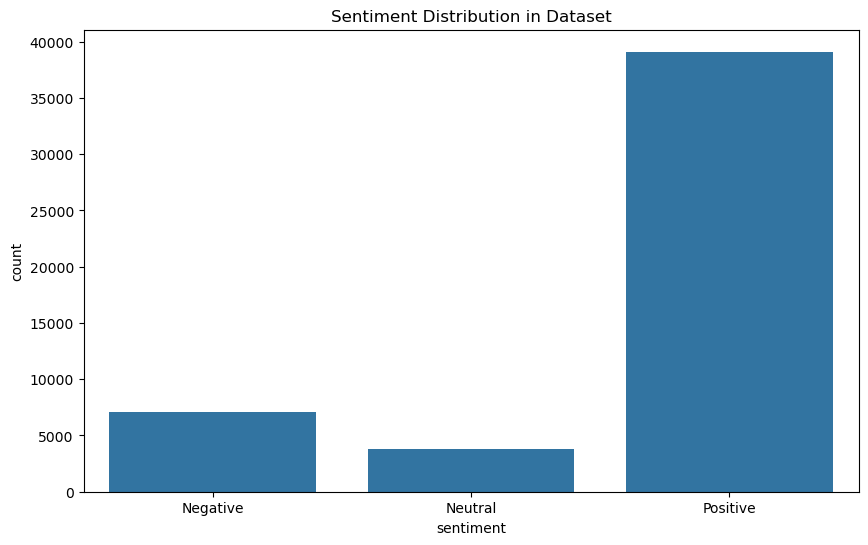


Preprocessing review text...

Extracting TF-IDF features...

Training the sentiment classifier...

Making predictions...

Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.66      0.64      1776
     Neutral       0.30      0.36      0.33       948
    Positive       0.92      0.89      0.91      9776

    accuracy                           0.82     12500
   macro avg       0.61      0.64      0.62     12500
weighted avg       0.83      0.82      0.82     12500



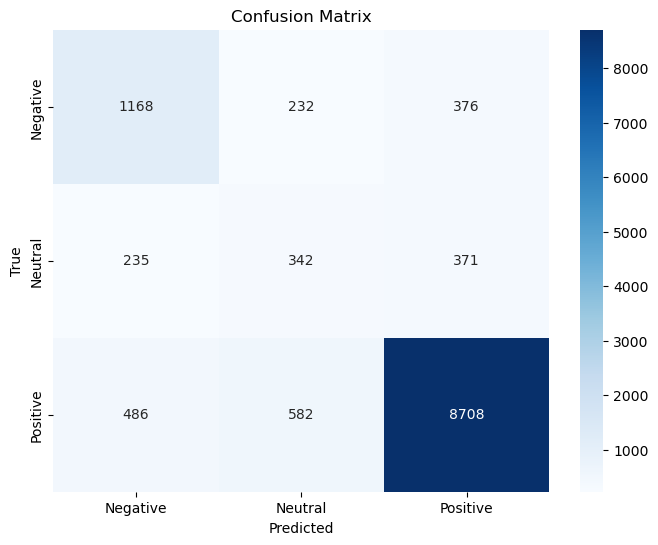

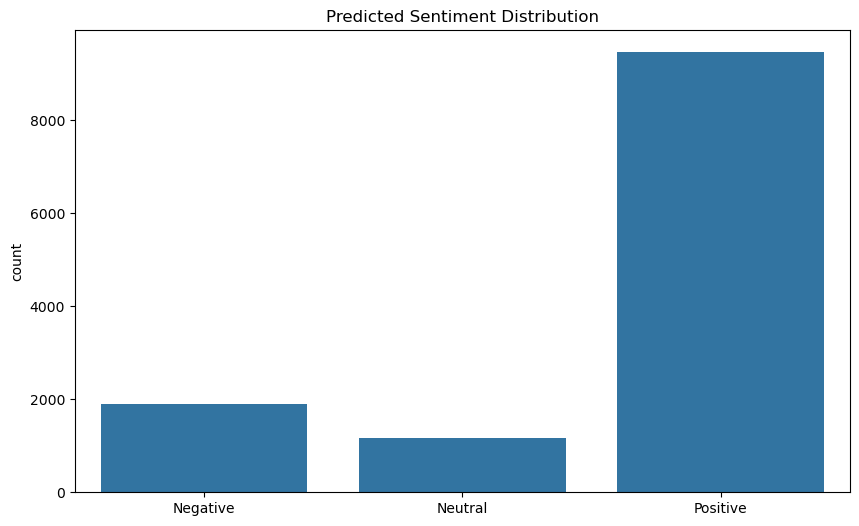


Top 10 words for Negative sentiment:
disappointing: 3.4954
horrible: 3.3061
terrible: 3.1088
disgusted: 3.0145
worst: 2.9322
destroyed: 2.9192
overpowers: 2.9027
awful: 2.8092
assumed: 2.7766
garbage: 2.7066

Top 10 words for Neutral sentiment:
ok: 3.5821
constipated: 3.5227
midel: 3.3897
pediatrician: 3.1792
dane: 3.0727
problembr: 3.0354
okay: 2.8504
eitherbr: 2.7452
horseradish: 2.7195
developed: 2.6538

Top 10 words for Positive sentiment:
great: 3.4618
perfect: 3.2222
highly: 3.1801
delicious: 3.0457
best: 3.0243
love: 2.9588
excellent: 2.7324
hooked: 2.6174
pleased: 2.4576
wonderful: 2.3945


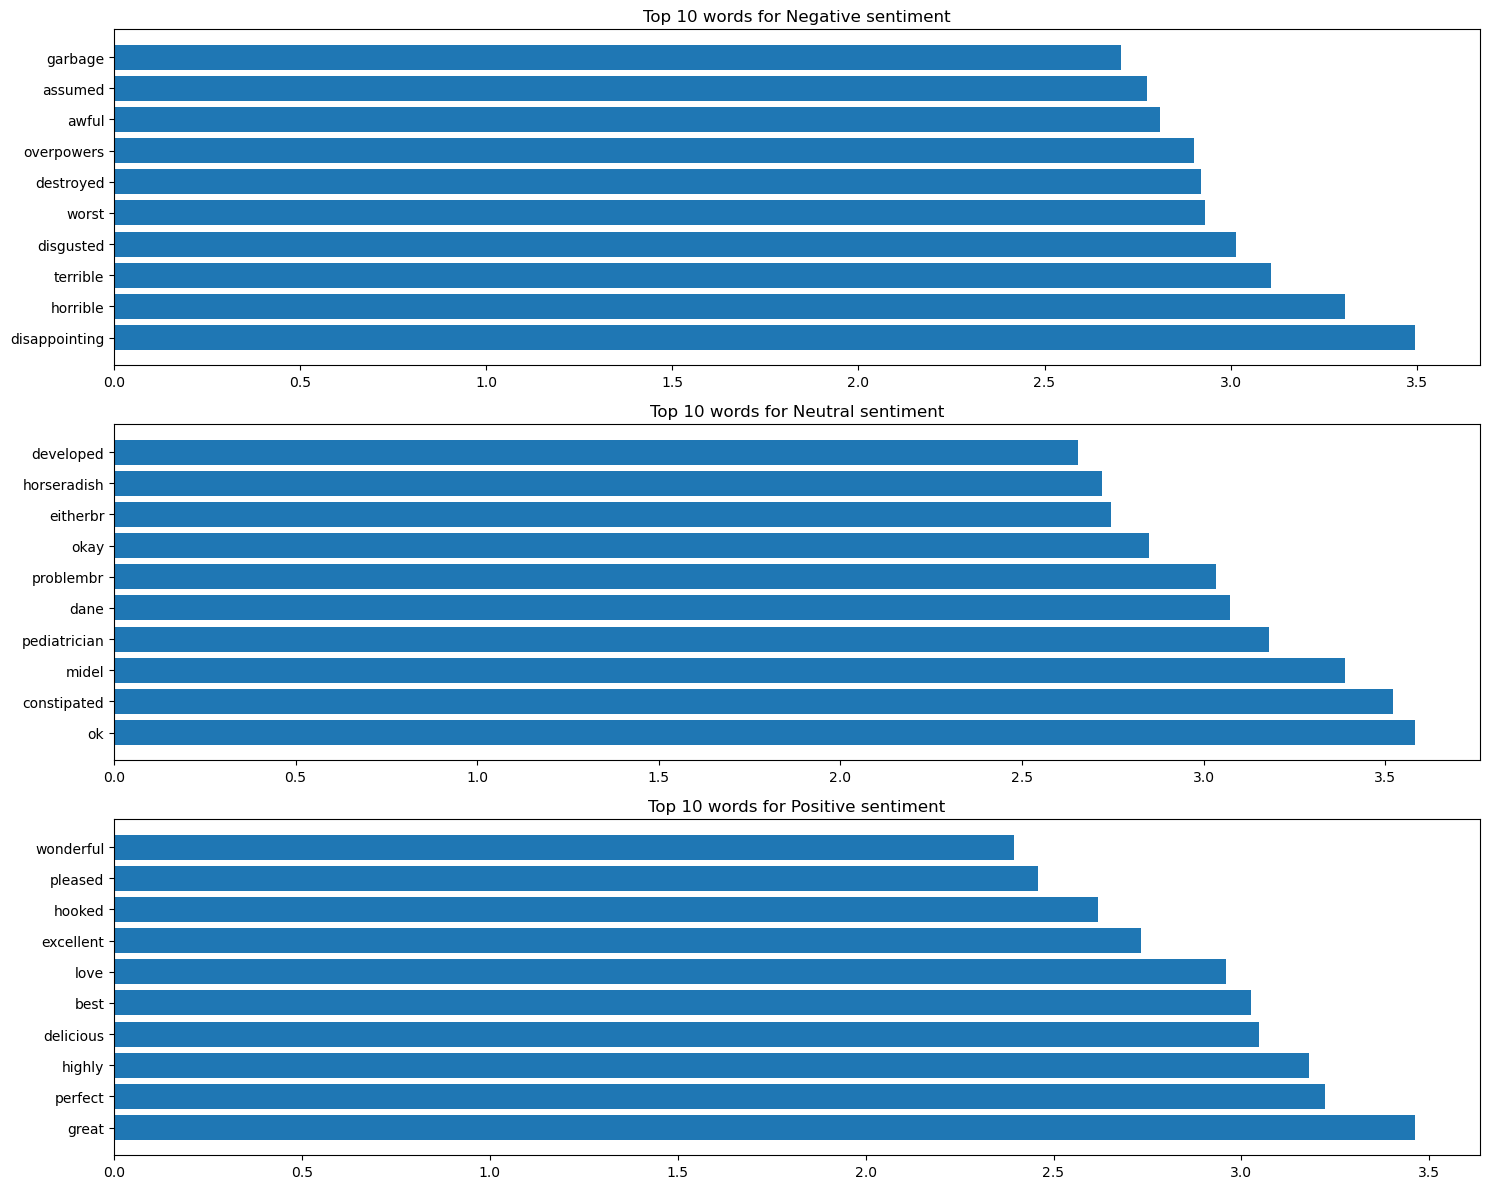


Testing the model with sample reviews:
Review: 'This product is terrible. Complete waste of money.'
Predicted sentiment: Negative

Review: 'It's okay, nothing special but does the job.'
Predicted sentiment: Neutral

Review: 'Absolutely love this! Best purchase I've made all year.'
Predicted sentiment: Positive



In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load product reviews dataset from Kaggle
# For the Amazon Fine Food Reviews dataset, we'll use 'Text' as review text and 'Score' as rating
print("Loading dataset - this may take a minute for large files...")
reviews_df = pd.read_csv('data/amazon/Reviews.csv')

# Display basic information about the dataset
print(f"Dataset shape: {reviews_df.shape}")
print("\nFirst few rows:")
print(reviews_df[['Score', 'Summary', 'Text']].head())

# Convert 5-star ratings to sentiment categories
# 1-2 stars: Negative (0)
# 3 stars: Neutral (1)
# 4-5 stars: Positive (2)
def convert_rating_to_sentiment(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

reviews_df['sentiment'] = reviews_df['Score'].apply(convert_rating_to_sentiment)

# For efficiency, take a sample if the dataset is very large
# The Amazon dataset has over 500,000 reviews, which might be too large to process quickly
if len(reviews_df) > 50000:
    reviews_df = reviews_df.sample(n=50000, random_state=42)
    print(f"Sampled dataset to {len(reviews_df)} reviews for faster processing")

# Display class distribution
print("\nSentiment distribution in the dataset:")
sentiment_counts = reviews_df['sentiment'].value_counts().sort_index()
print(sentiment_counts)
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=reviews_df)
plt.title('Sentiment Distribution in Dataset')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()

# Text preprocessing function
def preprocess_text(text):
    # Handle NaN values
    if isinstance(text, float) and np.isnan(text):
        return ""
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove punctuation and numbers
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    
    # Tokenize
    tokens = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing
print("\nPreprocessing review text...")
reviews_df['processed_text'] = reviews_df['Text'].apply(preprocess_text)

# Split the data
X = reviews_df['processed_text']
y = reviews_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# TF-IDF feature extraction
print("\nExtracting TF-IDF features...")
tfidf = TfidfVectorizer(max_features=5000, min_df=5)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train sentiment classifier
print("\nTraining the sentiment classifier...")
sentiment_classifier = LinearSVC(class_weight='balanced')
sentiment_classifier.fit(X_train_tfidf, y_train)

# Make predictions
print("\nMaking predictions...")
y_pred = sentiment_classifier.predict(X_test_tfidf)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred)
plt.title('Predicted Sentiment Distribution')
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()

# Most important words for each sentiment
feature_names = tfidf.get_feature_names_out()
coefs = sentiment_classifier.coef_

# Visualize top words for each sentiment
plt.figure(figsize=(15, 12))

for i, sentiment in enumerate(['Negative', 'Neutral', 'Positive']):
    # Get top words
    top_positive_coefs = np.argsort(coefs[i])[-10:]
    top_words = [feature_names[j] for j in top_positive_coefs]
    top_coefs = coefs[i][top_positive_coefs]
    
    # Print top words
    print(f"\nTop 10 words for {sentiment} sentiment:")
    for word, coef in zip(reversed(top_words), reversed(top_coefs)):
        print(f"{word}: {coef:.4f}")
    
    # Plot top words
    plt.subplot(3, 1, i+1)
    plt.barh(range(10), top_coefs[::-1], align='center')
    plt.yticks(range(10), top_words[::-1])
    plt.title(f'Top 10 words for {sentiment} sentiment')
    plt.tight_layout()

plt.show()

# Sample prediction function
def predict_sentiment(review_text, vectorizer, classifier):
    # Preprocess the text
    processed = preprocess_text(review_text)
    # Vectorize
    features = vectorizer.transform([processed])
    # Predict
    prediction = classifier.predict(features)[0]
    # Map to sentiment label
    sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return sentiment_map[prediction]

# Test the prediction function with a few examples
sample_reviews = [
    "This product is terrible. Complete waste of money.",
    "It's okay, nothing special but does the job.",
    "Absolutely love this! Best purchase I've made all year."
]

print("\nTesting the model with sample reviews:")
for review in sample_reviews:
    sentiment = predict_sentiment(review, tfidf, sentiment_classifier)
    print(f"Review: '{review}'")
    print(f"Predicted sentiment: {sentiment}\n")

### Important Notes:

- **Dataset Size:** The Amazon Fine Food Reviews dataset is large (over 500,000 reviews). I've included code to sample a smaller portion for faster processing.
- **Converting Ratings to Sentiment:** The dataset has ratings (1-5 stars) rather than sentiment labels. The code converts these to Negative (1-2 stars), Neutral (3 stars), and Positive (4-5 stars).
- **Handling NaN Values:** Added error handling for potential NaN values in the text.
- **Improved Text Processing:** Enhanced the preprocessing function to handle different data types.
- **Model Improvements:** Added class balancing with `class_weight='balanced'` to improve handling of uneven class distributions.
- **Additional Visualizations:** Added a confusion matrix and better visualization of the most important words.
- **Sample Prediction Function:** Added a function to easily test the model on new review texts.

This adaptation will give you a robust sentiment analysis model using real-world product reviews from the Amazon Fine Food Reviews dataset.


### Module 7: Time Series Analysis and Forecasting

#### Topics

- Time series data preparation
- Trend and seasonality analysis
- Moving averages and ARIMA models
- Forecasting future values

#### Hands-on Project

**Stock Price Predictor:** Analyze historical stock prices and build a forecasting model.


### For stock price time series forecasting with Kaggle data, I recommend using the S&P 500 stock data dataset. Here's how to adapt your code:

#### Getting the Dataset

- Go to Kaggle: [S&P 500 Stock Data](https://www.kaggle.com/datasets/camnugent/sandp500)
- Download the stocks dataset (`all_stocks_5yr.csv`)
- Place it in your working directory


Dataset contains 505 stocks
First few stocks: ['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM']

Selected AAPL stock data:
               open     high      low    close     volume  Name
date                                                           
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

Missing values:
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

Stock price statistics:
count    1259.000000
mean      109.066698
std        30.556812
min        55.789900
25%        84.830650
50%       109.010000
75%       127.120000
max       179.260000
Name: close, dtype: float64


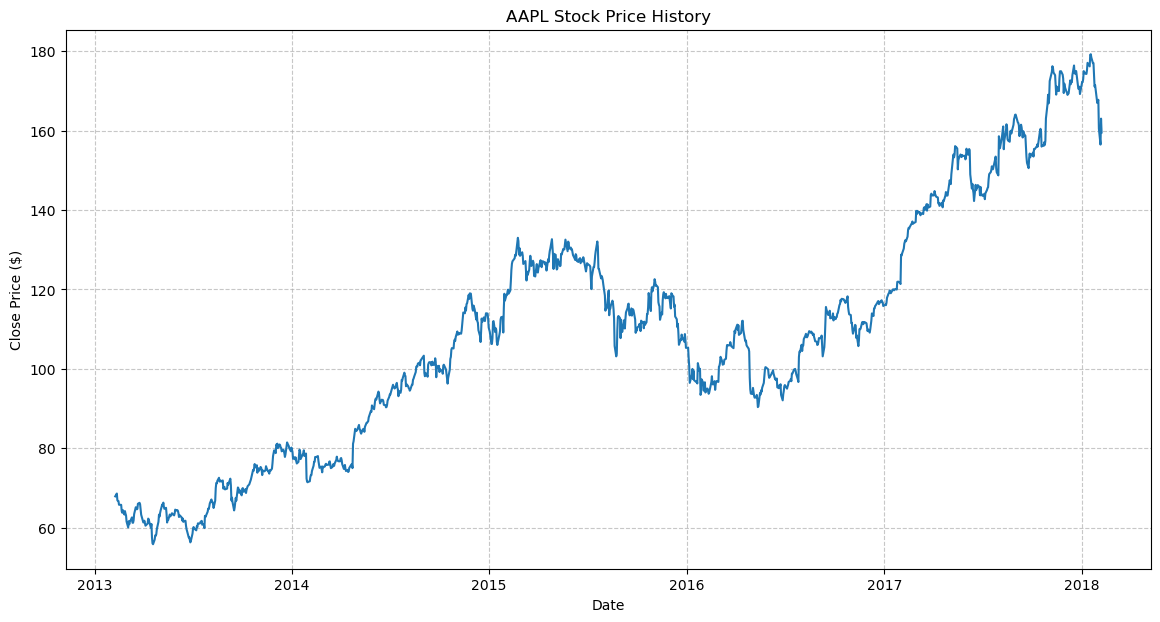

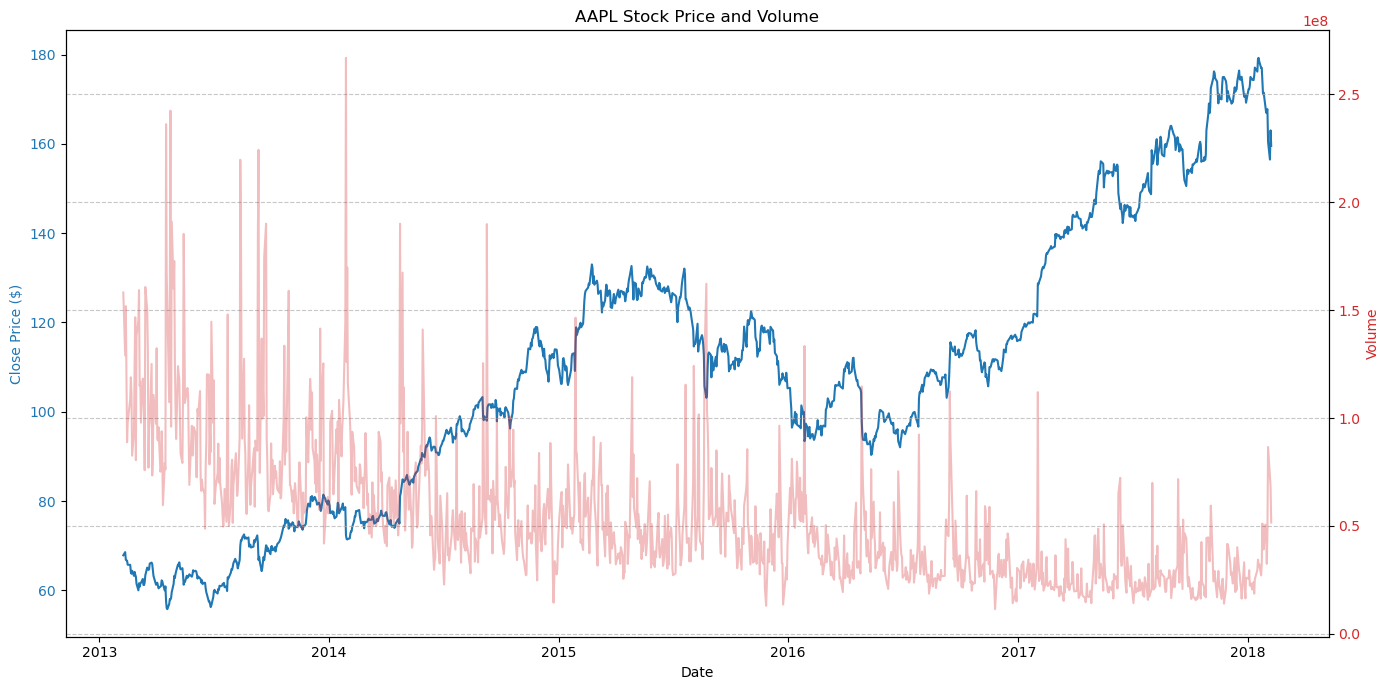

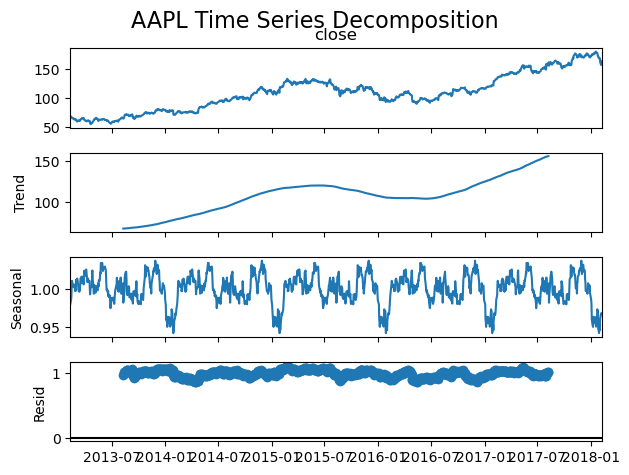


Splitting data at: 2017-08-07 00:00:00
Training data: 1132 days
Testing data: 127 days

Fitting ARIMA(5,1,0) model...
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1132
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2073.358
Date:                Fri, 07 Mar 2025   AIC                           4158.717
Time:                        15:04:00   BIC                           4188.902
Sample:                             0   HQIC                          4170.121
                               - 1132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0123      0.025      0.500      0.617      -0.036       0.060
ar.L2       

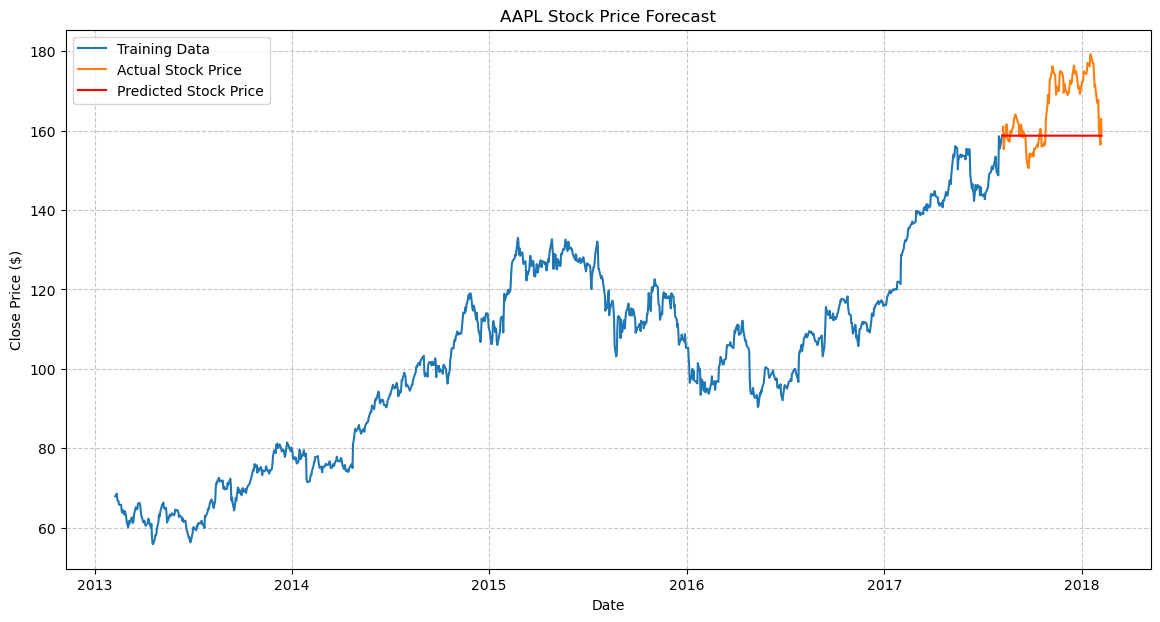

RMSE: $10.38
MAPE: nan%


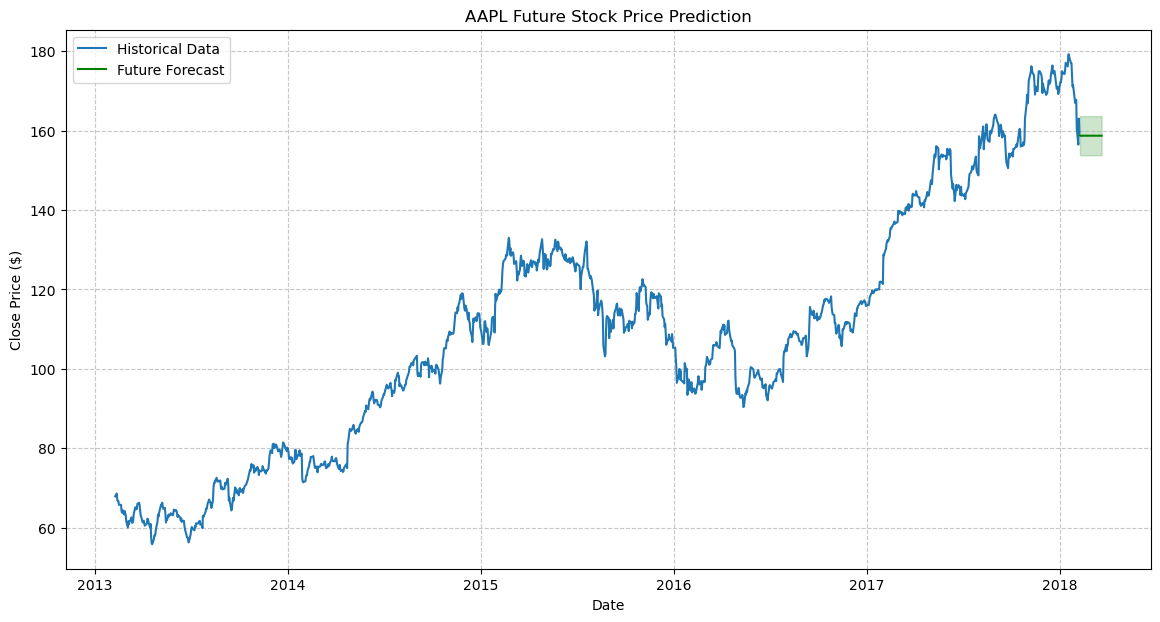


Forecasted stock prices for the next 30 trading days:
           Date  Forecasted Close Price
1132 2018-02-08              158.816133
1133 2018-02-09              158.724639
1134 2018-02-12              158.687903
1135 2018-02-13              158.733247
1136 2018-02-14              158.732884
1137 2018-02-15              158.731094
1138 2018-02-16              158.729532
1139 2018-02-19              158.730464
1140 2018-02-20              158.730467
1141 2018-02-21              158.730451
1142 2018-02-22              158.730404
1143 2018-02-23              158.730423
1144 2018-02-26              158.730423
1145 2018-02-27              158.730424
1146 2018-02-28              158.730422
1147 2018-03-01              158.730423
1148 2018-03-02              158.730423
1149 2018-03-05              158.730423
1150 2018-03-06              158.730423
1151 2018-03-07              158.730423
1152 2018-03-08              158.730423
1153 2018-03-09              158.730423
1154 2018-03-12          

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Load stock price data from Kaggle
# The S&P 500 dataset contains data for multiple stocks, so we'll pick one
all_stocks = pd.read_csv('data/stock/all_stocks_5yr.csv')

# Display available stocks
print(f"Dataset contains {all_stocks['Name'].nunique()} stocks")
print("First few stocks:", all_stocks['Name'].unique()[:10])

# Choose a specific stock (e.g., Apple)
stock_name = 'AAPL'  # You can change this to any available stock
stock_df = all_stocks[all_stocks['Name'] == stock_name].copy()

# Convert date and set as index
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.set_index('date', inplace=True)
stock_df.sort_index(inplace=True)

print(f"\nSelected {stock_name} stock data:")
print(stock_df.head())

# Check for missing values
missing_values = stock_df.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Fill any missing values using forward fill
if missing_values.sum() > 0:
    stock_df = stock_df.fillna(method='ffill')

# Basic statistics
print("\nStock price statistics:")
print(stock_df['close'].describe())

# Plot the stock price over time
plt.figure(figsize=(14, 7))
plt.plot(stock_df['close'])
plt.title(f'{stock_name} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot volume as well (additional insight)
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price ($)', color='tab:blue')
ax1.plot(stock_df.index, stock_df['close'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:red')
ax2.plot(stock_df.index, stock_df['volume'], color='tab:red', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title(f'{stock_name} Stock Price and Volume')
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Decompose time series to observe trend, seasonality, and residuals
try:
    decomposition = seasonal_decompose(stock_df['close'], model='multiplicative', period=252)  # 252 trading days in a year
    fig = decomposition.plot()
    plt.suptitle(f'{stock_name} Time Series Decomposition', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
except:
    print("Could not perform multiplicative decomposition. Trying additive...")
    decomposition = seasonal_decompose(stock_df['close'], model='additive', period=252)
    fig = decomposition.plot()
    plt.suptitle(f'{stock_name} Time Series Decomposition', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Split data into training and testing sets
# Determine split dates based on available data
latest_date = stock_df.index.max()
split_date = latest_date - pd.DateOffset(months=6)  # Use last 6 months for testing
print(f"\nSplitting data at: {split_date}")

train_data = stock_df['close'][stock_df.index <= split_date]
test_data = stock_df['close'][stock_df.index > split_date]

print(f"Training data: {len(train_data)} days")
print(f"Testing data: {len(test_data)} days")

# Fit ARIMA model
# p, d, q parameters would ideally be determined by AIC/BIC or auto_arima
p, d, q = 5, 1, 0  # Example parameters
print(f"\nFitting ARIMA({p},{d},{q}) model...")
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Stock Price')
plt.plot(test_data.index, forecast, color='red', label='Predicted Stock Price')
plt.title(f'{stock_name} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Evaluate forecast
rmse = sqrt(mean_squared_error(test_data, forecast))
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
print(f'RMSE: ${rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

# Make future predictions
future_steps = 30  # Next 30 trading days
future_forecast = model_fit.forecast(steps=future_steps)

# Create future dates (only business days for trading)
# FIX: Remove 'closed' parameter which is causing the error
future_dates = pd.date_range(start=stock_df.index[-1], periods=future_steps+1, freq='B')

# Plot historical + future forecast
plt.figure(figsize=(14, 7))
plt.plot(stock_df['close'], label='Historical Data')
plt.plot(future_dates[1:], future_forecast, color='green', label='Future Forecast')
plt.title(f'{stock_name} Future Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add confidence intervals for the forecast
plt.fill_between(future_dates[1:], 
                 future_forecast - 1.96 * np.std(model_fit.resid),
                 future_forecast + 1.96 * np.std(model_fit.resid),
                 color='green', alpha=0.2, label='95% Confidence Interval')
plt.show()

# Print the forecasted values
print("\nForecasted stock prices for the next 30 trading days:")
forecast_df = pd.DataFrame({
    'Date': future_dates[1:],
    'Forecasted Close Price': future_forecast
})
print(forecast_df)

# Additional analysis: Calculate potential returns
starting_price = stock_df['close'].iloc[-1]
# Fix: future_forecast is a pandas Series with numeric index, not a list
ending_price = future_forecast.iloc[-1] if isinstance(future_forecast, pd.Series) else future_forecast[-1]
potential_return = ((ending_price - starting_price) / starting_price) * 100

print(f"\nPotential {future_steps}-day return: {potential_return:.2f}%")
if potential_return > 0:
    print(f"Forecast suggests an UPWARD trend for {stock_name}")
else:
    print(f"Forecast suggests a DOWNWARD trend for {stock_name}")






### Important Notes:

- **Stock Selection:** The S&P 500 dataset contains multiple stocks, so I've added code to select a specific stock (Apple by default).
- **Column Names:** The Kaggle dataset uses lowercase column names (`'close'` instead of `'Close'`), so I've adjusted the code accordingly.
- **Date Handling:** Instead of hardcoded dates (which might not exist in the dataset), I've used relative dates, taking the last 6 months as the test set.
- **Data Validation:** Added checks for missing values and appropriate handling.
- **Enhanced Visualizations:**
  - Added volume plot alongside price
  - Added grid lines for better readability
  - Added confidence intervals to the forecast plot
- **Error Handling:** Added try-except for the decomposition and warnings suppression.
- **Business Days:** Used business day frequency for future dates to better represent trading days.
- **Additional Analysis:** Added calculation of potential returns and trend direction.
